# (Simulation) Earthquake
> Example 1

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [논문연구]

___

## 7월 29일 면담

- **2차원 Simulation**
1. epsilon 제거한 underline을 파란선으로 표현하였다.'



- **3차원 Simulation**
1. 2차원과 같이 sd = 5 를 기본으로 하여 ebayesthresh를 실행
2. sd가 커질수록 fhat이 f 자체는 잘 따라가는 것 처럼 보이지만, 사실 underline은 벗어나고 있었다.
    - 반면에 sd가 작아지면 epsilon을 포함한 f값을 그대로 따라가는 경향을 보였다.
    - underline을 벗어나기 때문에 sd는 5로 두는 것이 낫겠다.
3. ref 옵션을 주어서 R square가 지정값 이상인 점을 빨간점으로 표시하였다.
4. 선의 의미
    - Point 1 : 연한 파란 점, f
    - Point 2 : 연한 검은 점, fhat
    - Trace 1 : 검은 선 f1(underline)
    - Trace 2 : 검은 선 z = 0
    
    
    
- **지도 Real Data**
1. 진도가 특정값 이상인 점(빨간점)과 Residual square가 특정값 이상인 점(파란점)을 표현할 때 겹치는 곳은 하얀점으로 나타내었다.

---

#### 5.1.1 SPECTRAL NETWORK

$$g_{\theta} \star x = U g_{\theta}(\Lambda) U^{\top}x$$

$x$는 실수($n \times 1$ or $1 \times n$), $g_{\theta}$는 $\theta$의 대각행렬, $\theta$는 실수($n \times 1$ or $1 \times n$)

$U$가 정규화된 그래프 라플라시안의 고유벡터 행렬일떄($L = I_N - D^{-\frac{1}{2}}AD^{-\frac{1}{2}} = U\Lambda U^{\top}$), 고유값 $\Lambda$의 대각 행렬을 가진다.

Bruna가 재안한 operation에서 Henaff 는 평활 계수를 가진 파라미터로 차원적이며 집약적인 spectral filters 를 만듦

---

Beuna

---

Henaff

$W$가 $n \times n$  대칭 행렬

$L = I_N - D^{-\frac{1}{2}}WD^{-\frac{1}{2}}$

$D_{ij} = \sum_{ij}W_{ij}$

$U = (u_1, \dots, u_N)$

$X = \mathbb{R}^N$

$x *_Gg = U^{\top} (U_x \odot U)g)$

$\odot$: a point-wise product

$w_g = (w_1, \dots, w_N)$

$x *_Gg := U^{\top} (diag(w_g)U_x)$

$\big{|} \frac{\partial^k \hat{x} (\xi)}{\partial \xi^k} \big{|} \le \int |u|^k |x(u)|\: \mathrm{d}x $

$\hat{x} (\xi)$ is the Fourier tranform of $x$

$w_g = \mathcal{K}\tilde{w}_g$

$\mathcal{K}$ is a smoothing kernal, $\mathcal{K} \in \mathbb{R}^{N \times N_0}$

forward, backward 가능

unsupervised graph estimation 
- $d(i,j) = \|X_i - X_j \|^2
- $w(i,j) = exp^{\frac{d(i,j)}{\sigma^2}}$$

supervised graph estimation
- a fully-connected network
- $d_{sup}(i,j) = \| W_{1,i} - W_{1,j} \|^2$

---

#### 5.1.2 CHEBNET

$$g_{\theta} \star x \approx  \sum^{K}_{k=0}\theta_k T_k (\tilde{L})x$$

 The Chebyshev polynomials 체비셰프 다항식

$\tilde{L} = \cfrac{2}{\lambda_{max}} L - I_N$

$\lambda_{max}$는 라플라시안 고유값들 중 가장 큰 값

$T_k (x) = 2xT_{k-1}(x) - T_{k-2} (x)$

$T_0 (x) = 1$, $T_1(x) = x$

## imports

In [1]:
import rpy2
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [2]:
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from haversine import haversine
from IPython.display import HTML

In [3]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

## EbayesThresh

In [4]:
%load_ext rpy2.ipython

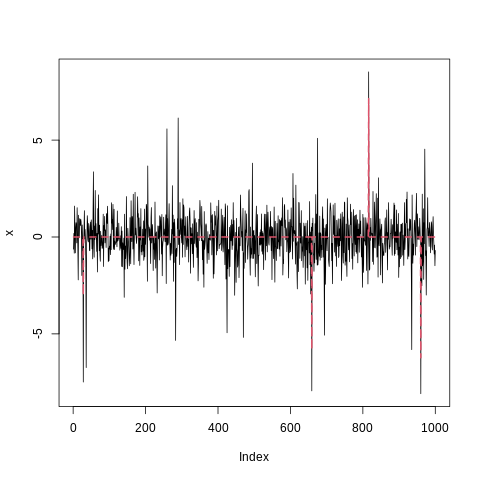

In [5]:
%%R
library(EbayesThresh)
set.seed(1)
x <- rnorm(1000) + sample(c( runif(25,-7,7), rep(0,975)))
plot(x,type='l')
mu <- EbayesThresh::ebayesthresh(x,sdev=2)
lines(mu,col=2,lty=2,lwd=2)

### R + python

`-` R환경에 있던 x를 가지고 오기

In [6]:
%R -o x 

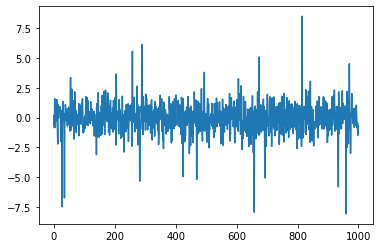

In [7]:
plt.plot(x)

`-` R환경에 있는 ebayesthresh 함수를 가지고 오기

In [8]:
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

In [9]:
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [10]:
xhat = np.array(ebayesthresh(FloatVector(x)))

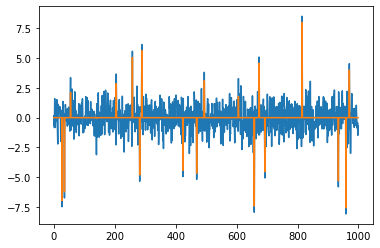

In [11]:
plt.plot(x)
plt.plot(xhat)

## 시도 1

In [91]:
_x = np.linspace(0,2,1000)
_y1 = 5*_x
_y = _y1 + x # x is epsilon

In [92]:
df1=pd.DataFrame({'x':_x, 'y':_y, 'y1':_y1})

In [93]:
w=np.zeros((1000,1000))

In [94]:
for i in range(1000):
    for j in range(1000):
        if i==j :
            w[i,j] = 0
        elif np.abs(i-j) <= 1 : 
            w[i,j] = 1

In [145]:
class SIMUL:
    def __init__(self,df):
        self.df = df
        self.y = df.y.to_numpy()
        self.y1 = df.y1.to_numpy()
        self.x = df.x.to_numpy()
        self.n = len(self.y)
        self.W = w
    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)      
    def fit(self,sd=5): # fit with ebayesthresh
        self._eigen()
        self.ybar = self.Psi.T @ self.y # fbar := graph fourier transform of f
        self.power = self.ybar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.ybar**2),sd=sd))
        self.ybar_threshed = np.where(self.power_threshed>0,self.ybar,0)
        self.yhat = self.Psi@self.ybar_threshed
        self.df = self.df.assign(yHat = self.yhat)
        self.df = self.df.assign(Residual = self.df.y- self.df.yHat)
        self.differ3=(np.abs(self.y-self.yhat)-np.min(np.abs(self.y-self.yhat)))/(np.max(np.abs(self.y-self.yhat))-np.min(np.abs(self.y-self.yhat))) #color 표현은 위핸 표준화
        #with plt.style.context('seaborn-dark'):
            #plt.figure(figsize=(16,10))
            #plt.scatter(self.x,self.y,c=self.differ3,cmap='Purples',s=50)
            #plt.plot(self.x,self.yhat, 'k--')
    def vis(self,ref=60):
        fig = go.Figure()
        fig.add_scatter(x=self.x,y=self.y,mode="markers",marker=dict(size=3, color="#9fc5e8"),name='y',opacity=0.7)
        fig.add_scatter(x=self.x,y=self.yhat,mode="markers",marker=dict(size=3, color="#000000"),name='yhat',opacity=0.7)
        fig.add_scatter(x=self.df.query('Residual**2>@ref')['x'],y=self.df.query('Residual**2>@ref')['y'],mode="markers",marker=dict(size=3, color="#f20505"),name='R square',opacity=1)
        fig.add_trace(go.Scatter(x=self.x,y=self.y1,mode='lines',line_color='#0000FF',name='underline'))
        fig.update_layout(width=1000,height=1000,autosize=False,margin={"r":0,"t":0,"l":0,"b":0})
        return HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))

In [146]:
class SIMUL2(SIMUL):
    def fit2(self,sd=5):
        self.fit()
        with plt.style.context('seaborn-dark'):
            plt.figure(figsize=(16,10))
            plt.scatter(self.x,self.y,c=self.differ3,cmap='Purples',s=50)
            plt.plot(self.x,self.y1,'b--')
            plt.plot(self.x[:995],self.yhat[:995], 'k--')

In [147]:
_simul = SIMUL2(df1)

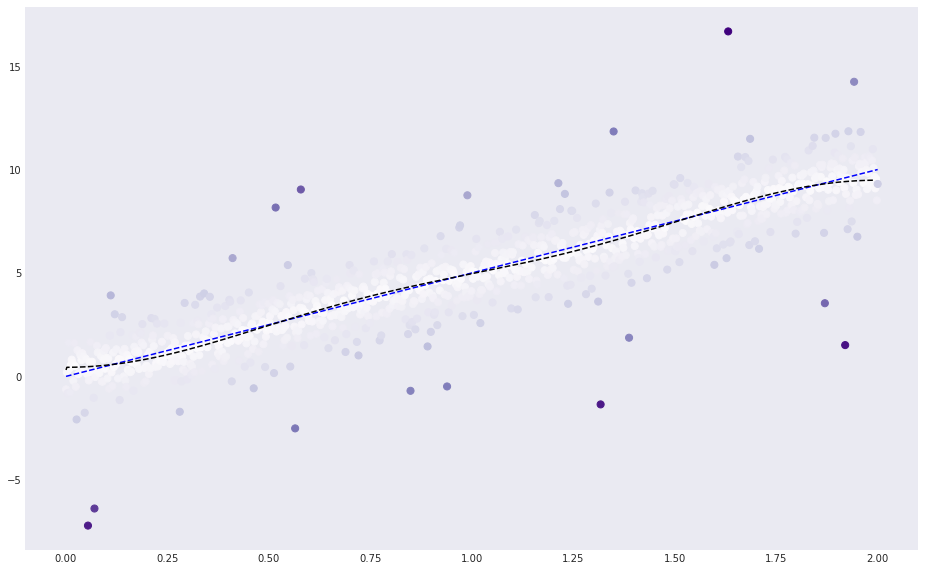

In [148]:
_simul.fit2()

In [150]:
#_simul.vis()

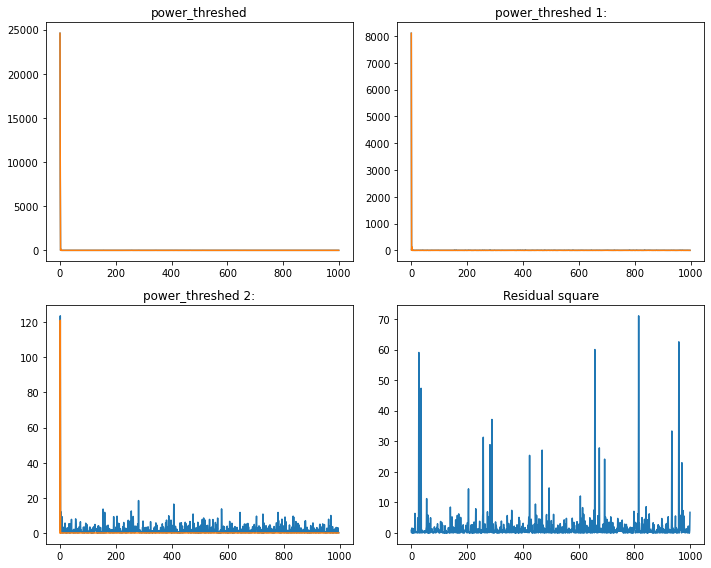

In [144]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

## 시도 2

In [21]:
_x = np.linspace(0,2,1000)
_y1 = 5*_x**2
_y = _y1 + x # x is epsilon

In [22]:
df2=pd.DataFrame({'x':_x, 'y':_y, 'y1':_y1})

In [23]:
_simul = SIMUL2(df2)

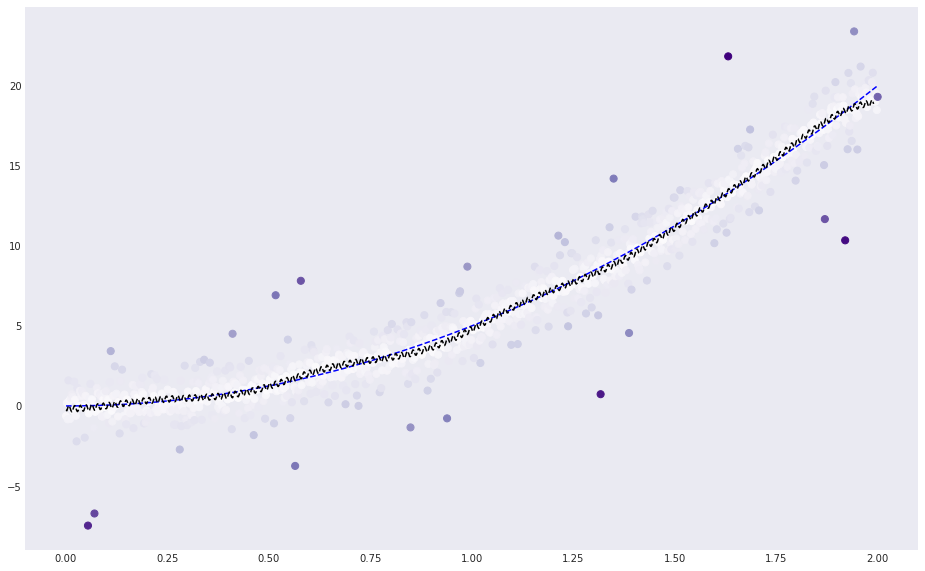

In [24]:
_simul.fit2(sd=6)

In [150]:
#_simul.vis()

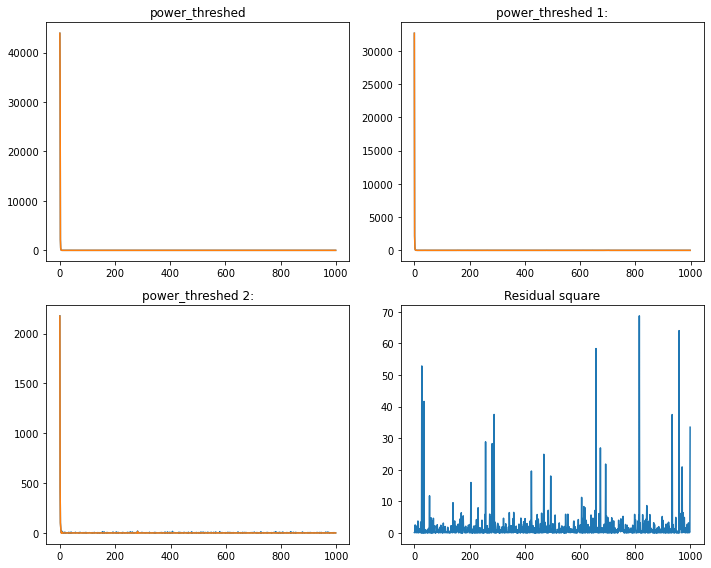

In [25]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

## 시도 3

In [26]:
_x = np.linspace(0,2,1000)
_y1 = 5*_x**3 
_y = _y1 + x # x is epsilon

In [27]:
df3=pd.DataFrame({'x':_x, 'y':_y, 'y1':_y1})

In [28]:
_simul = SIMUL2(df3)

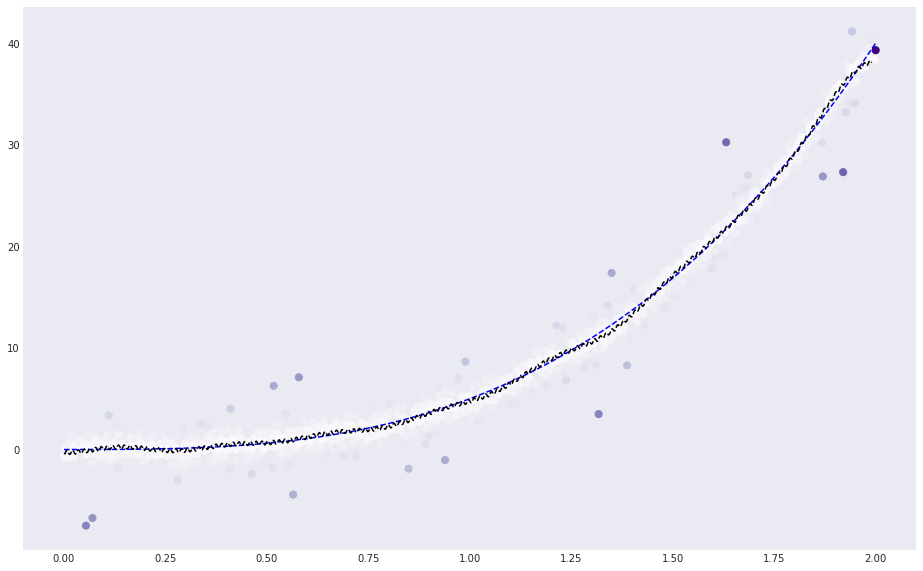

In [29]:
_simul.fit2()

In [150]:
#_simul.vis()

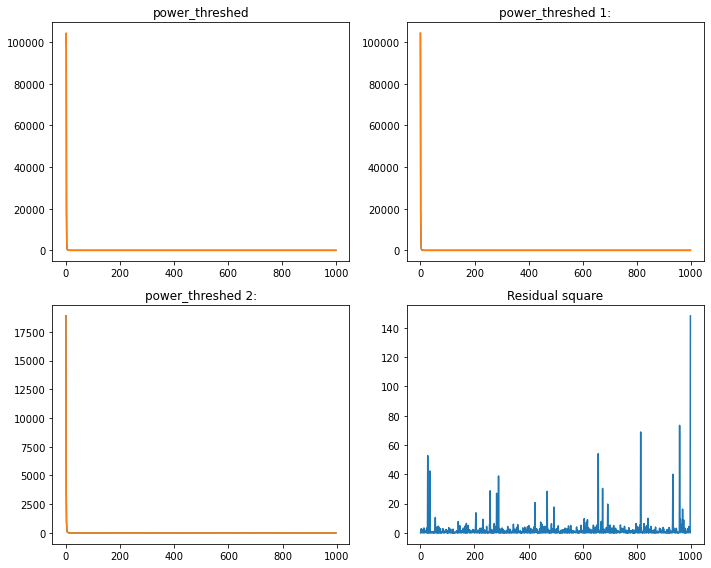

In [30]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

## 시도 4

In [31]:
_x = np.linspace(0,2,1000)
_y1 = 5*np.sin(_x) 
_y = _y1 + x # x is epsilon

In [32]:
df4=pd.DataFrame({'x':_x, 'y':_y, 'y1':_y1})

In [33]:
_simul = SIMUL2(df4)

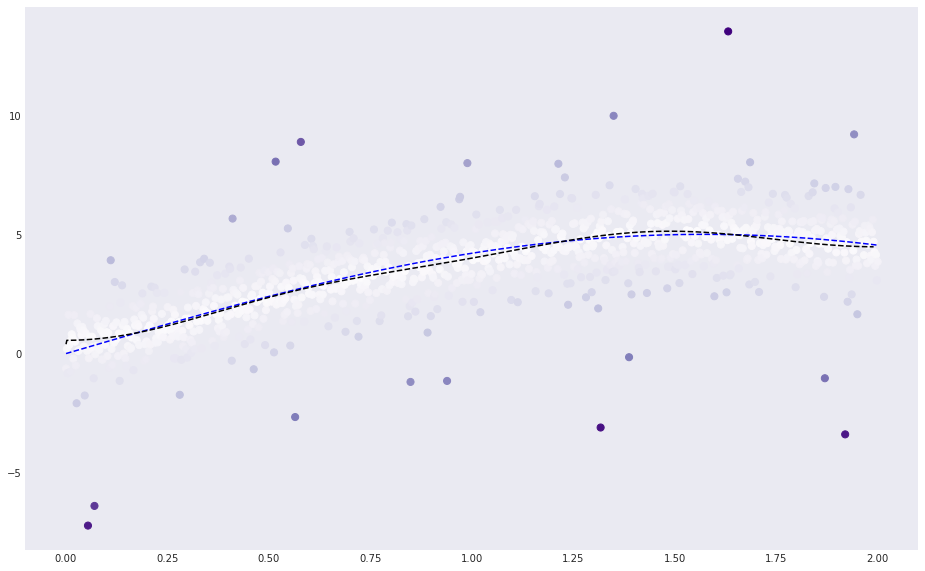

In [34]:
_simul.fit2()

In [150]:
#_simul.vis()

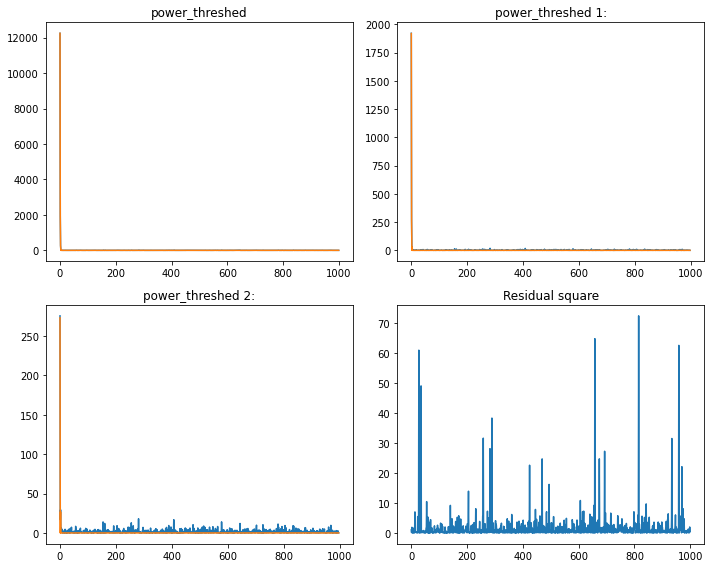

In [35]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

## 시도 5

In [36]:
_x = np.linspace(0,2,1000)
_y1 =  3*np.cos(_x) + 1*np.cos(_x**2) + 0.5*np.cos(5*_x) 
_y = _y1 + x # x is epsilon

In [37]:
df5=pd.DataFrame({'x':_x, 'y':_y, 'y1':_y1})

In [38]:
class SIMUL2(SIMUL):
    def fit2(self,sd=5):
        self.fit()
        with plt.style.context('seaborn-dark'):
            plt.figure(figsize=(16,10))
            plt.scatter(self.x,self.y,c=self.differ3,cmap='Purples',s=50)
            plt.plot(self.x,self.y1, 'b--')
            plt.plot(self.x[5:995],self.yhat[5:995], 'k--')

In [39]:
_simul = SIMUL2(df5)

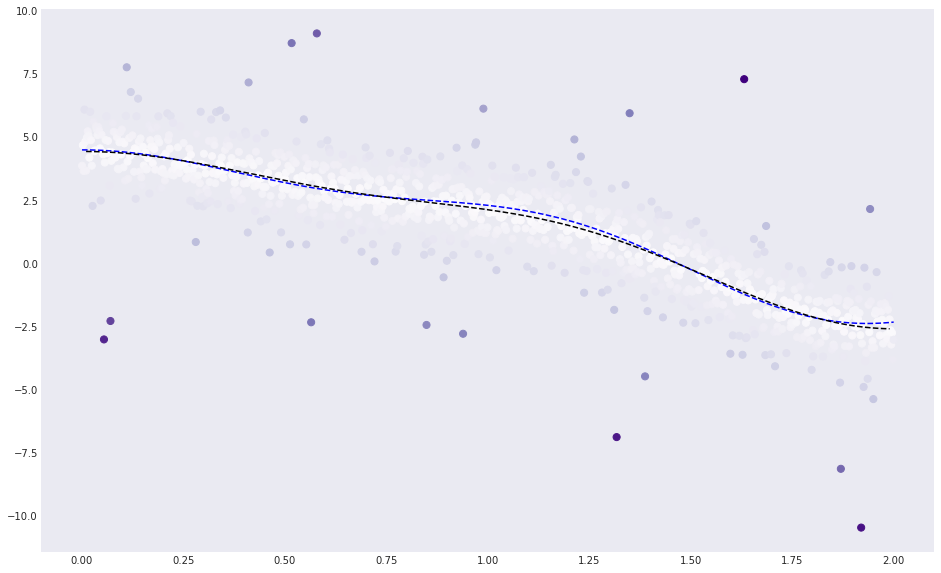

In [40]:
_simul.fit2()

In [150]:
#_simul.vis()

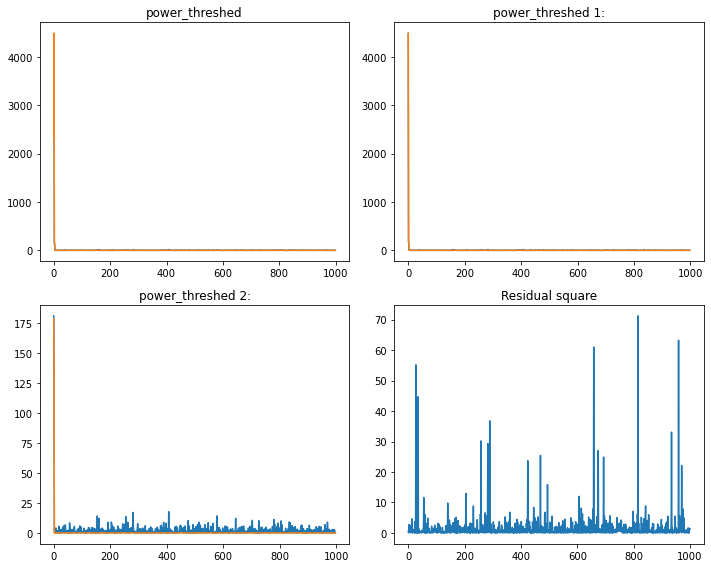

In [41]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

---

## 3D 시도 1

In [42]:
### Example 2
np.random.seed(777)
pi=np.pi
n=1000
ang=np.linspace(-pi,pi-2*pi/n,n)
r=2+np.sin(np.linspace(0,6*pi,n))
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=10*np.sin(np.linspace(0,3*pi,n))
f = f1 + x

```python
# 1. 
p=plt.figure(figsize=(12,4), dpi=200)  # Make figure object 

# 2. 
ax=p.add_subplot(1,1,1, projection='3d')
ax.grid(False)
ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = f
bottom = np.zeros_like(top)
width=depth=0.05
#ax.bar3d(vx, vy, bottom, width, depth, top, shade=False)
ax.scatter3D(vx,vy,f,zdir='z',s=10,marker='.')
ax.scatter3D(vx,vy,f1,zdir='z',s=10,marker='.')
ax.bar3d(vx, vy, bottom, width, depth, 0, color='Black',shade=False)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-10,10)
```

In [43]:
df = pd.DataFrame({'x' : vx, 'y' : vy, 'f' : f, 'f1' : f1})

In [44]:
class SIMUL:
    def __init__(self,df):
        self.df = df 
        self.f = df.f.to_numpy()
        self.f1 = df.f1.to_numpy()
        self.x = df.x.to_numpy()
        self.y = df.y.to_numpy()
        self.n = len(self.f)
        self.theta= None
    def get_distance(self):
        self.D = np.zeros([self.n,self.n])
        locations = np.stack([self.x, self.y],axis=1)
        for i in tqdm.tqdm(range(self.n)):
            for j in range(i,self.n):
                self.D[i,j]=np.linalg.norm(locations[i]-locations[j])
        self.D = self.D + self.D.T
    def get_weightmatrix(self,theta=1,beta=0.5,kappa=4000):
        self.theta = theta
        dist = np.where(self.D < kappa,self.D,0)
        self.W = np.exp(-(dist/self.theta)**2)
    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)       
    def fit(self,sd=5,ref=60): # fit with ebayesthresh
        self._eigen()
        self.fbar = self.Psi.T @ self.f # fbar := graph fourier transform of f
        self.power = self.fbar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.fbar**2),sd=sd))
        self.fbar_threshed = np.where(self.power_threshed>0,self.fbar,0)
        self.fhat = self.Psi@self.fbar_threshed
        self.df = self.df.assign(fHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.f- self.df.fHat)
        self.dif=(np.abs(self.f-self.fhat)-np.min(np.abs(self.f-self.fhat)))/(np.max(np.abs(self.f-self.fhat))-np.min(np.abs(self.f-self.fhat)))
        self.df = self.df.assign(dif = self.dif)
        self.bottom = np.zeros_like(self.f)
        self.width=0.05
        self.depth=0.05
        p = plt.figure(figsize=(16,16))
        ax = p.add_subplot(1,1,1, projection='3d')
        ax.grid(False)
        ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
        ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
        ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
        ax.scatter3D(self.x,self.y,self.f,c=self.dif,cmap='winter',zdir='z',s=50,marker='.',alpha=0.2)
        ax.scatter3D(self.x,self.y,self.fhat,color='black',zdir='z',s=50,marker='.',alpha=0.2)
        #ax.plot3D(self.x,self.y,self.fhat,'black')
        ax.scatter3D(self.df.query('Residual**2>@ref')['x'],self.df.query('Residual**2>@ref')['y'],self.df.query('Residual**2>@ref')['f'],color='red',zdir='z',s=100,marker='.',alpha=1)
        ax.plot3D(self.x,self.y,self.f1,'black')
        ax.plot3D(self.x,self.y,[0]*1000,'black')
        ax.set_xlim(-3,3)
        ax.set_ylim(-3,3)
        ax.set_zlim(-10,10)
    def vis(self,ref=60):
        fig = go.Figure()
        fig.add_scatter3d(x=self.x,y=self.y,z=self.f, mode="markers",marker=dict(size=3, color="#9fc5e8"),name='f',opacity=0.2)
        fig.add_scatter3d(x=self.x,y=self.y,z=self.fhat, mode="markers",marker=dict(size=3, color="#999999"),name='fhat',opacity=0.2)
        #fig.add_trace(go.Scatter3d(x=self.x,y=self.y,z=self.fhat,mode='lines',line_color='#000000'))
        fig.add_scatter3d(x=self.df.query('Residual**2>@ref')['x'],y=self.df.query('Residual**2>@ref')['y'],z=self.df.query('Residual**2>@ref')['f'], mode="markers",marker=dict(size=3, color="#f20505"),name='R square',opacity=1)
        fig.add_trace(go.Scatter3d(x=self.x,y=self.y,z=self.f1,mode='lines',line_color='#000000',name='underline'))
        fig.add_trace(go.Scatter3d(x=self.x,y=self.y,z=[0]*1000,mode='lines',line_color='#000000',name='z=0'))
        fig.update_layout(width=1000,height=1000,autosize=False,margin={"r":0,"t":0,"l":0,"b":0})
        return HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))

In [45]:
_simul = SIMUL(df)

In [46]:
_simul.get_distance()

100%|██████████| 1000/1000 [00:01<00:00, 520.02it/s]


In [47]:
_simul.D[_simul.D>0].mean()

2.6888234729389295

(array([ 66308.,  64352.,  68358., 177302., 166964., 114648.,  94344.,
        111136.,  75508.,  60080.]),
 array([0.00628415, 0.54637775, 1.08647135, 1.62656495, 2.16665855,
        2.70675214, 3.24684574, 3.78693934, 4.32703294, 4.86712654,
        5.40722013]),
 <BarContainer object of 10 artists>)

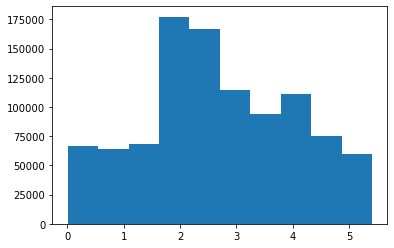

In [48]:
plt.hist(_simul.D[_simul.D>0])

In [49]:
_simul.get_weightmatrix(theta=(2.6888234729389295),kappa=2500) 

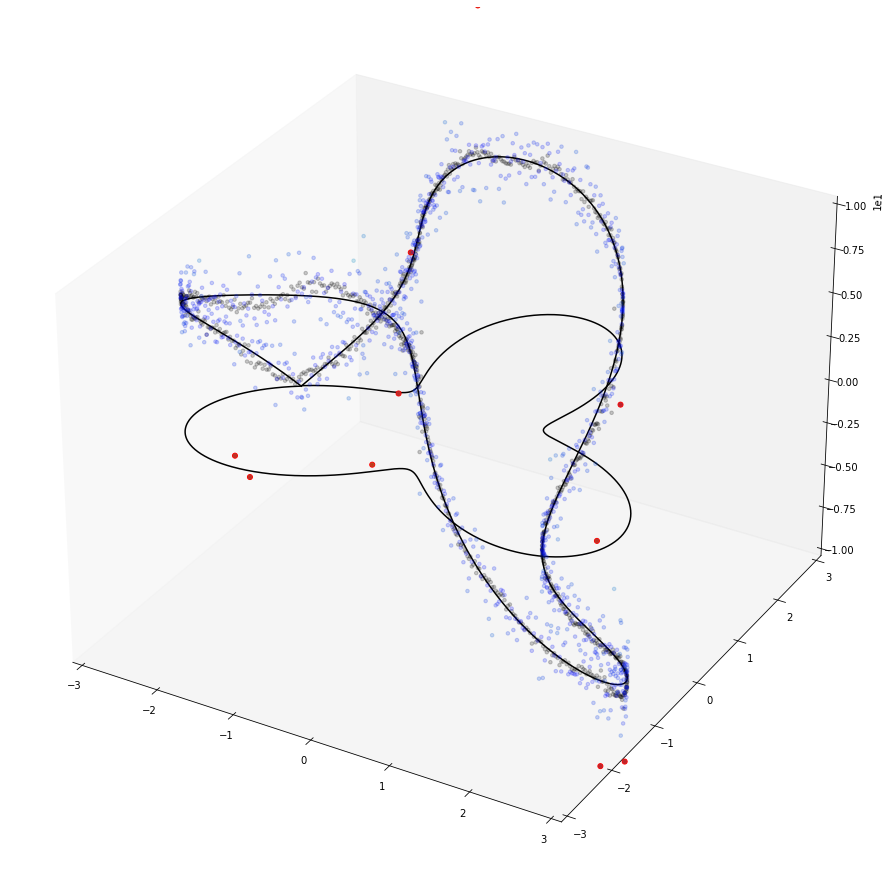

In [50]:
_simul.fit(sd=5,ref=20)

In [51]:
#_simul.vis(ref=20)

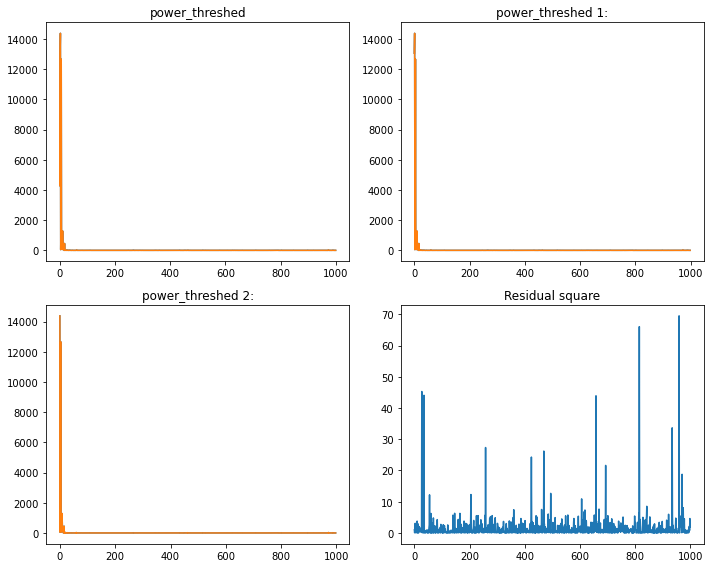

In [52]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

## 3D 시도 2

In [53]:
### Example 2
np.random.seed(777)
pi=np.pi
n=1000
ang=np.linspace(-pi,pi-2*pi/n,n)
r=2+np.sin(np.linspace(0,8*pi,n))
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=10*np.sin(np.linspace(0,3*pi,n))
f = f1 + x

```python
# 1. 
p=plt.figure(figsize=(12,4), dpi=200)  # Make figure object 

# 2. 
ax=p.add_subplot(1,1,1, projection='3d')
ax.grid(False)
ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = f
bottom = np.zeros_like(top)
width=depth=0.05
#ax.bar3d(vx, vy, bottom, width, depth, top, shade=False)
ax.scatter3D(vx,vy,f,zdir='z',s=10,marker='.')
ax.scatter3D(vx,vy,f1,zdir='z',s=10,marker='.')
ax.bar3d(vx, vy, bottom, width, depth, 0, color='Black',shade=False)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-10,10)
```

In [54]:
df1 = pd.DataFrame({'x' : vx, 'y' : vy, 'f' : f,'f1':f1})

In [55]:
_simul = SIMUL(df1)

In [56]:
_simul.get_distance()

100%|██████████| 1000/1000 [00:01<00:00, 517.83it/s]


In [57]:
_simul.D[_simul.D>0].mean()

2.6984753461932702

(array([ 63450.,  64118., 146970., 169756., 138202., 126198., 162650.,
         75642.,  28416.,  23598.]),
 array([0.0062838 , 0.60565122, 1.20501864, 1.80438605, 2.40375347,
        3.00312089, 3.6024883 , 4.20185572, 4.80122314, 5.40059055,
        5.99995797]),
 <BarContainer object of 10 artists>)

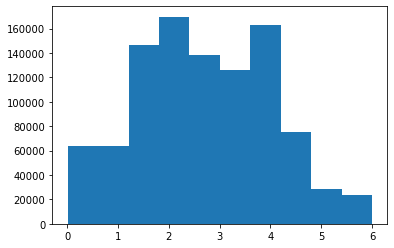

In [58]:
plt.hist(_simul.D[_simul.D>0])

In [59]:
_simul.get_weightmatrix(theta=(2.6984753461932702),kappa=2500) 

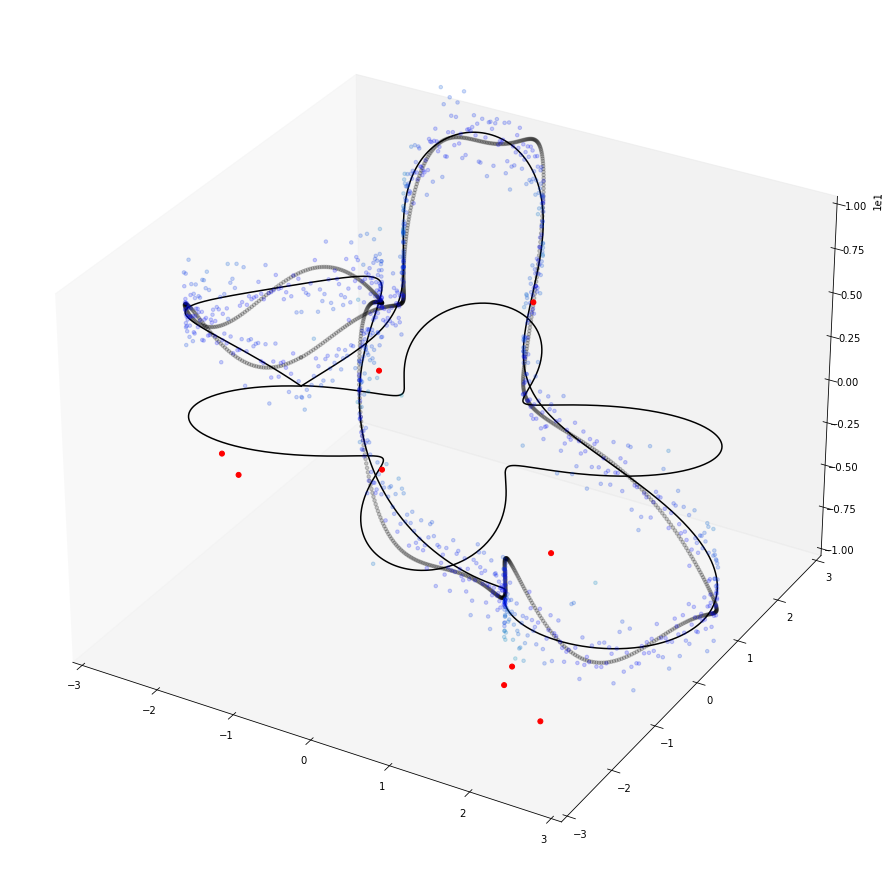

In [60]:
_simul.fit(sd=100,ref=30)

In [61]:
#_simul.vis(ref=50)

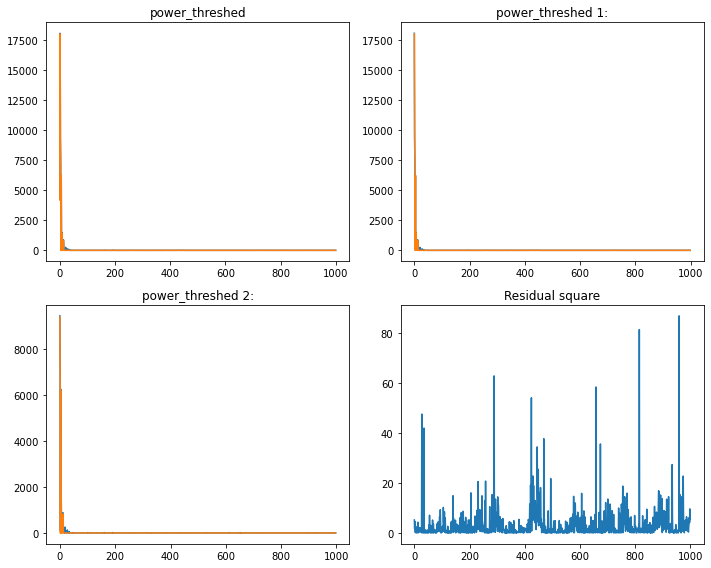

In [62]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()

## 3D 시도 3

In [63]:
### Example 2
np.random.seed(777)
pi=np.pi
n=1000
ang=np.linspace(-pi,pi-2*pi/n,n)
r=2+np.sin(np.linspace(0,6*pi,n))
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=10*np.sin(np.linspace(0,6*pi,n))
f = f1 + x

```python
# 1. 
p=plt.figure(figsize=(12,4), dpi=200)  # Make figure object 

# 2. 
ax=p.add_subplot(1,1,1, projection='3d')
ax.grid(False)
ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = f
bottom = np.zeros_like(top)
width=depth=0.05
#ax.bar3d(vx, vy, bottom, width, depth, top, shade=False)
ax.scatter3D(vx,vy,f,zdir='z',s=10,marker='.')
ax.scatter3D(vx,vy,f1,zdir='z',s=10,marker='.')
ax.bar3d(vx, vy, bottom, width, depth, 0, color='Black',shade=False)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-10,10)
```

In [64]:
df2 = pd.DataFrame({'x' : vx, 'y' : vy, 'f' : f,'f1':f1})

In [65]:
_simul = SIMUL(df2)

In [66]:
_simul.get_distance()

100%|██████████| 1000/1000 [00:02<00:00, 482.29it/s]


In [67]:
_simul.D[_simul.D>0].mean()

2.6888234729389295

(array([ 66308.,  64352.,  68358., 177302., 166964., 114648.,  94344.,
        111136.,  75508.,  60080.]),
 array([0.00628415, 0.54637775, 1.08647135, 1.62656495, 2.16665855,
        2.70675214, 3.24684574, 3.78693934, 4.32703294, 4.86712654,
        5.40722013]),
 <BarContainer object of 10 artists>)

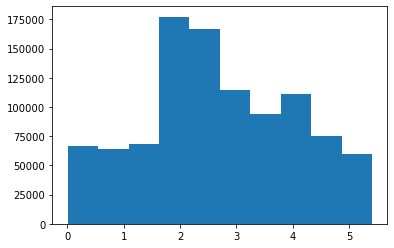

In [68]:
plt.hist(_simul.D[_simul.D>0])

In [69]:
_simul.get_weightmatrix(theta=(2.6984753461932702),kappa=2500) 

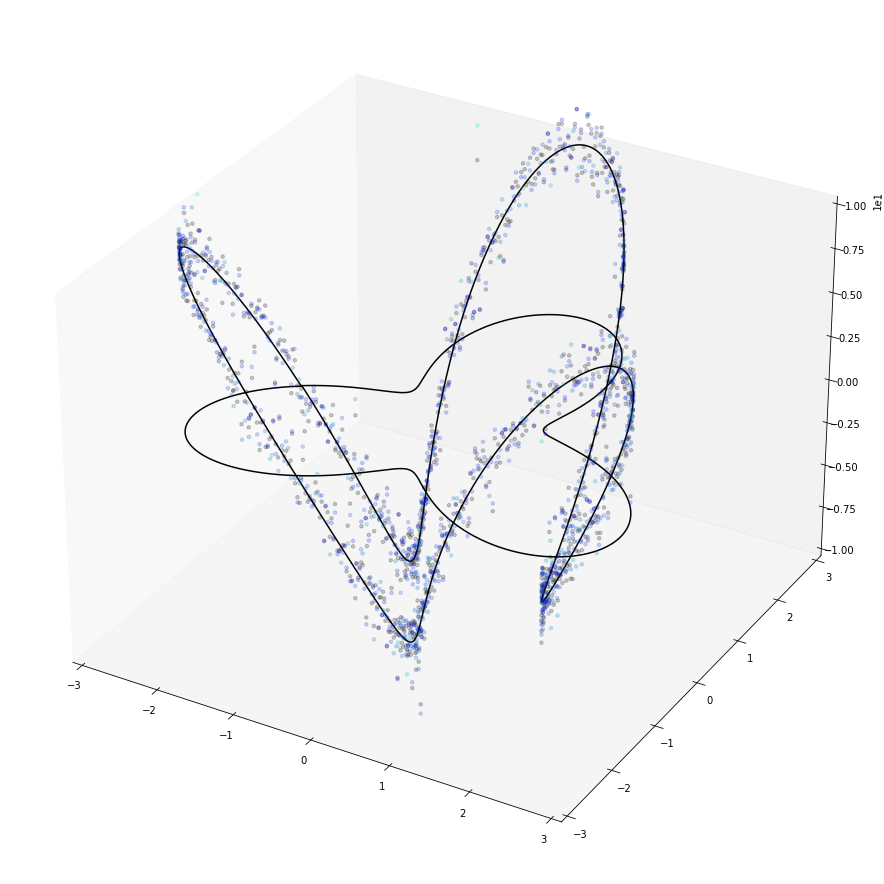

In [70]:
_simul.fit(sd=1,ref=30)

In [71]:
#_simul.vis(ref=50)

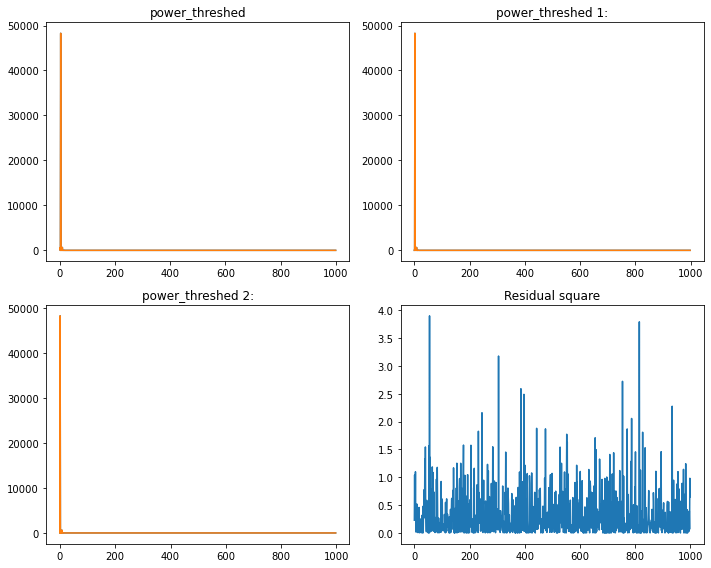

In [72]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(_simul.power)
axs[0,0].plot(_simul.power_threshed)
axs[0,0].set_title('power_threshed')

axs[0,1].plot(_simul.power[1:])
axs[0,1].plot(_simul.power_threshed[1:])
axs[0,1].set_title('power_threshed 1:')

axs[1,0].plot(_simul.power[2:])
axs[1,0].plot(_simul.power_threshed[2:])
axs[1,0].set_title('power_threshed 2:')

axs[1,1].plot((_simul.df.Residual)**2)
axs[1,1].set_title('Residual square')

plt.tight_layout()
plt.show()